In [14]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_parquet('jobs_data.parquet')
df = dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

<function matplotlib.pyplot.show(close=None, block=None)>

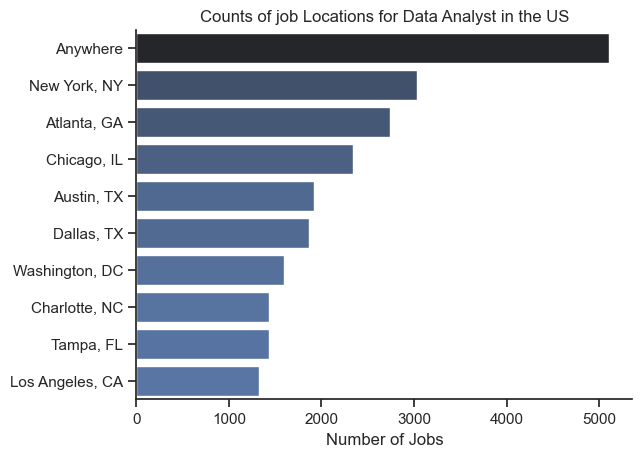

In [28]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x= 'count', y= 'job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show

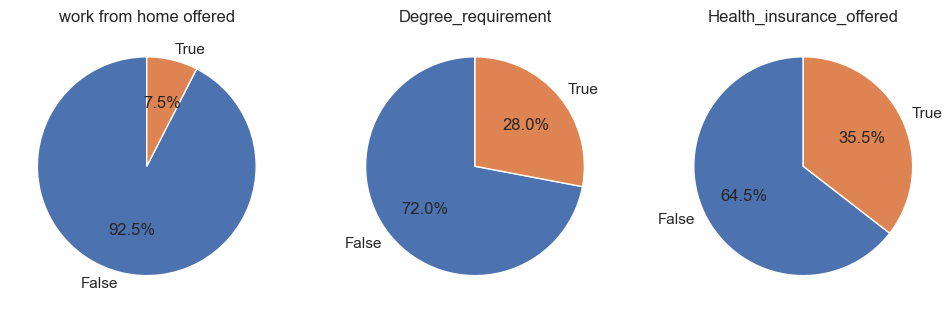

In [32]:
dict_column = {
    'job_work_from_home': 'work from home offered',
    'job_no_degree_mention': 'Degree_requirement',
    'job_health_insurance': 'Health_insurance_offered'
}
fig, ax= plt.subplots(1,3)
fig.set_size_inches((12,5))

for i, (column,title)in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)
plt.show()    

<function matplotlib.pyplot.show(close=None, block=None)>

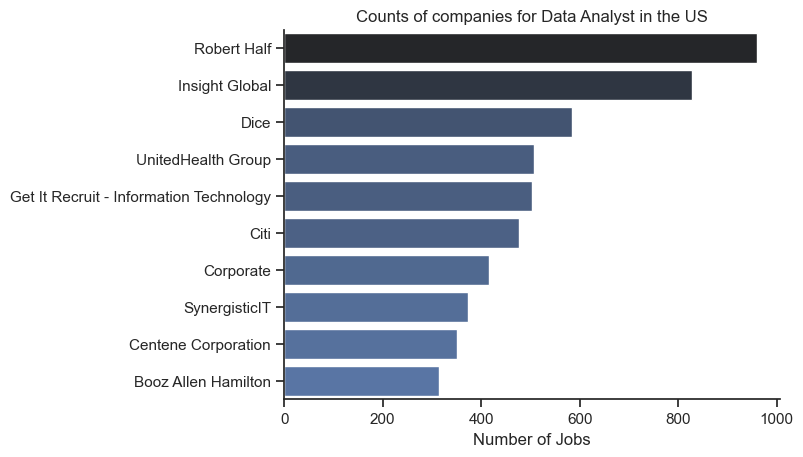

In [33]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data = df_plot, x= 'count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show